# Technical Report: <br> Exploratory Semantic Analysis of Wind Turbine Maintenance Logs using Large Language Models

## 1. Introduction

### 1.1 Project Objective
A wealth of operational intelligence is locked within the unstructured free-text of wind turbine maintenance logs, a resource largely inaccessible to traditional quantitative reliability analysis. This technical report documents the workflow for an exploratory framework that uses state-of-the-art Large Language Models (LLMs) to move beyond simple classification and perform complex semantic analysis. The primary objective is to demonstrate how LLMs can be used as an analytical tool to derive actionable reliability insights directly from this unstructured text.

### 1.2 Methodology and Workflow Overview
The methodology is centred on **structured prompt engineering**, where detailed prompts are designed to guide an LLM to perform specific analytical tasks. This report demonstrates the application of this framework to a large industrial dataset through four distinct analytical workflows:
1.  **Failure Mode Identification**: Aggregating thousands of log entries to identify and quantify recurring failure modes for a critical component.
2.  **Causal Chain Inference**: Analysing a chronological sequence of events for a single high-failure turbine to generate plausible hypotheses about root causes.
3.  **Comparative Site Analysis**: Identifying distinctive, site-specific operational patterns by comparing maintenance logs from different wind farms.
4.  **Data Quality Audit**: Performing a comprehensive audit of the entire dataset to identify common data quality issues and provide actionable recommendations.

## 2. Setup and Data Preparation

### 2.1 LLM Framework
This analysis utilises two state-of-the-art Large Language Models: **OpenAI's GPT-5** and **Google's Gemini 2.5 Pro**. These models were chosen for their advanced semantic reasoning capabilities. 
- **GPT-5** was selected for its benchmarked performance on reasoning tasks with this type of data.
- **Gemini 2.5 Pro** was utilised for the data quality audit due to its significantly larger context window, which allowed for the analysis of the entire dataset in a single pass.

### 2.2 Data Pre-processing
The dataset consists of nearly 11,000 maintenance logs from a portfolio of onshore wind farms in Portugal, covering up to seven years of operation. A preliminary, multi-stage cleaning pipeline was applied to prepare the data for this analysis, a process detailed in the accompanying `1_data_cleaning.ipynb` notebook. 

This initial pipeline involved:
- Removing logs with uninformative descriptors or those related to non-turbine infrastructure.
- Cleaning the free-text fields using regular expressions to remove syntactic noise.
- Anonymising all farm, turbine, and component identifiers using two-letter codes to protect commercial sensitivity.

This notebook uses the cleaned data subsets generated from that initial process to perform the four analytical workflows.

## Task 1: Identifying Common Failure Modes

### 1.1. Objective
The first analytical task is to identify and quantify the most common failure modes for a critical and high-failure component: the power converter. The goal is to process 1,065 unstructured maintenance logs specific to this component and synthesise them into a clear, prioritised list of recurring issues.

### 1.2. LLM Prompt
The following prompt was provided to the LLM. It assigns the role of an expert Reliability Engineer, provides the context and data, and specifies the required tasks and a structured JSON output format.

**Prompt for the LLM:**

In [ ]:
# ROLE:
You are an expert Reliability Engineer with rich experience in wind turbine diagnostics and maintenance. Your task is to perform a failure mode analysis based on raw maintenance logs.

# CONTEXT:
The provided data consists of a set of maintenance logs for a single component type: Power Converter. These logs contain unstructured text written by technicians in the 'Description' and 'Observations' fields (written in Portugese). Your goal is to synthesise this information to identify recurring failure modes, moving beyond simple keyword matching to a deep semantic understanding of the issues described.

# TASKS:
1.  Analyse all provided log entries.
2.  Group logs that describe the same underlying problem, even if they use different terminology/wording.
3.  For each distinct failure mode you identify, provide a concise, synthesised title and a one-sentence technical description.
4.  Estimate the number and percentage of logs that correspond to each failure mode.
5.  Extract up to three direct quotes from the logs that serve as the best evidence for each identified failure mode.
6.  Present the output as a single JSON object in a code block.

# INPUT DATA:
See the attached `converter_subset.csv` file.

# OUTPUT JSON FORMAT:
Each object in the array should represent a distinct failure mode and must follow this exact structure:
```json
[
  {
    "failure_mode_title": "Failure Mode Title",
    "failure_mode_description": "One sentence technical description of the failure mode.",
    "log_count": <integer>,
    "log_percentage": <float>,
    "representative_quotes": [
      "<quote_1>",
      "<quote_2>",
      "<quote_3>"
    ]
  }
]
```

### 1.3. LLM Response & Results Synthesis
As requested, the LLM returned a structured JSON object containing a list of 15 distinct failure modes, each with a synthesised description, log count, and representative quotes. The following Python code parses this JSON output to create a Pareto chart for visualisation and a summary table for detailed review.

**Response 1: OpenAI GPT 5, T = 0.5, 1065 logs:**

In [9]:
# Python elements added for saving as JSON

converter_json = '''
[
  {
    "failure_mode_title": "Q8 breaker malfunctions (open, cannot close, feedback error)",
    "failure_mode_description": "Frequent trips or command failures of the Q8 breaker due to feedback faults or mechanical/electrical issues cause the converter to disconnect or fail to reclose.",
    "log_count": 140,
    "log_percentage": 20.0,
    "representative_quotes": [
      "Ocorrência do erro 353 - Q8 Breaker Open",
      "Paragens com o erro Q8 breaker open.",
      "Q8 Close not possible"
    ]
  },
  {
    "failure_mode_title": "Main Switch open (FM300) and mainswitch mechanism faults",
    "failure_mode_description": "The LV MainSwitch opens or fails to latch/close (often FM300) leading to converter de-energisation and repeated downtime, sometimes due to mechanical issues.",
    "log_count": 84,
    "log_percentage": 12.0,
    "representative_quotes": [
      "Paragem da turbina com o erro FM300 (LV MainSwitch off)",
      "Main switch não ligou remotamente após dispara de linha",
      "Erro no conversor. FM300 - LV MainSwitch off."
    ]
  },
  {
    "failure_mode_title": "Main Inverter class faults (FM1209/FM1208/FM1201)",
    "failure_mode_description": "Main Inverter reports Class C/B/A faults indicating internal converter protection trips tied to hardware condition, insulation or thermal/operational thresholds.",
    "log_count": 77,
    "log_percentage": 11.0,
    "representative_quotes": [
      "Paragem da turbina com o erro FM1209 (MI class C (Service!) Fault)",
      "Turbina parou com o erro FM1208 (MI class B Fault)",
      "Paragem com o erro FM1201-MI class A Fault"
    ]
  },
  {
    "failure_mode_title": "Converter/VCP thermal overload and cooling system issues",
    "failure_mode_description": "Over-temperature alarms on the VCP/PowerCab/Busbar and cooling system faults or clogged filters trigger converter derating or trips.",
    "log_count": 70,
    "log_percentage": 10.0,
    "representative_quotes": [
      "Paragens com o erro High temp. VCP Board 59°C",
      "Paragens com o erro Busbar temp. high.",
      "Turbina apresenta o erro FM868 (Air Temp PwrCab PwrFld H Warn)."
    ]
  },
  {
    "failure_mode_title": "Grid/Rotor inverter hardware errors and overcurrent/overvoltage trips",
    "failure_mode_description": "Hardware errors and protection trips on grid/rotor inverter stages (overcurrent, HW error, OVP) intermittently shut down the converter.",
    "log_count": 70,
    "log_percentage": 10.0,
    "representative_quotes": [
      "Paragens com o erro Grid inv. HW error L_",
      "Paragens com o erro Rotor inv. HW error L_",
      "Paragens com o erro Ext. High cur. Grid inv. L0"
    ]
  },
  {
    "failure_mode_title": "DC undervoltage / excitation low voltage on converter",
    "failure_mode_description": "Low DC or excitation voltage conditions on the converter DC link or rotor excitation path cause trips and not-ready states.",
    "log_count": 42,
    "log_percentage": 6.0,
    "representative_quotes": [
      "Paragens com o erro Ext. low DC voltage.",
      "DC Undervoltage: V",
      "Paragens com erro ExEx low voltage L1: 0V"
    ]
  },
  {
    "failure_mode_title": "Q7 breaker (grid disconnect) trips/errors",
    "failure_mode_description": "Q7 breaker opens or reports errors, preventing grid connection and causing converter shutdowns.",
    "log_count": 35,
    "log_percentage": 5.0,
    "representative_quotes": [
      "Paragens com o erro 352 - Q7 breaker open",
      "Paragens com o erro Error on Q7.",
      "Q7 breaker open."
    ]
  },
  {
    "failure_mode_title": "Communication and bus errors (Interbus/IBS, Not Ready states)",
    "failure_mode_description": "Communication faults (e.g., Interbus FM700) and converter 'not ready' statuses interrupt inverter control and lead to stops.",
    "log_count": 42,
    "log_percentage": 6.0,
    "representative_quotes": [
      "Turbina parou com FM700 (IBS Interbus Stop).",
      "Problema de comunicação",
      "Ocorrência do Status 3000 - Frequency converter not ready"
    ]
  },
  {
    "failure_mode_title": "Power module/IGBT/SKIIPack failures and blown fuses",
    "failure_mode_description": "Failures of power modules (SKIIPacks/phase modules) and IGBTs, often accompanied by blown fuses, require hardware replacement and cause trips.",
    "log_count": 49,
    "log_percentage": 7.0,
    "representative_quotes": [
      "Substituição de skiipacks",
      "Substituição do IGBT e fusíveis",
      "Substituição de 1 phase module do MI"
    ]
  },
  {
    "failure_mode_title": "Safety Chain open (FM50) and related interlocks",
    "failure_mode_description": "The safety chain is activated (FM50), opening interlocks that prevent converter operation until reset and root cause resolution.",
    "log_count": 21,
    "log_percentage": 3.0,
    "representative_quotes": [
      "Paragem com o erro FM50-SafetyChain activated",
      "Insistência do erro FM50 Safety Chain actived",
      "Rearme local do safety chain na máquina"
    ]
  },
  {
    "failure_mode_title": "PFC (Power Factor Correction) system and capacitor bank faults",
    "failure_mode_description": "PFC breaker trips (79) and capacitor bank failures or replacements indicate reactive power circuit issues affecting converter operation.",
    "log_count": 14,
    "log_percentage": 2.0,
    "representative_quotes": [
      "79-PFC breaker open",
      "Avaria no Banco de Condensadores",
      "Replace Capacitors of converter."
    ]
  },
  {
    "failure_mode_title": "Arc/smoke detection trips (F60) in converter cabinet",
    "failure_mode_description": "Smoke or arc detection triggers protective opening (F60/Q8) and shuts down the converter for safety.",
    "log_count": 14,
    "log_percentage": 2.0,
    "representative_quotes": [
      "Smoke detected, Q8/F60 open.",
      "Paragens com o erro Arc detected, F60 tripped.",
      "Ocorrência do erro 4230 - Grid disc. smoke warning"
    ]
  },
  {
    "failure_mode_title": "Asymmetric current/voltage detection",
    "failure_mode_description": "Protection trips caused by phase asymmetry in current or voltage indicate imbalance or measurement/contact issues in the converter path.",
    "log_count": 21,
    "log_percentage": 3.0,
    "representative_quotes": [
      "Paragens com o erro Asym.currL1.",
      "Paragens com o erro Asym.voltL3: V,Others:V.",
      "Intervenção devido a inúmeras paragens com o erro asymetric current"
    ]
  },
  {
    "failure_mode_title": "Insulation monitoring and earth fault trips",
    "failure_mode_description": "Insulation monitor trips and earth fault detections on the LV side stop the converter until insulation issues are cleared.",
    "log_count": 14,
    "log_percentage": 2.0,
    "representative_quotes": [
      "Paragem com o erro FM1209 - MI class C (Service!) Fault e FM346 - LV InsulatMonitor 660V Stop",
      "Paragem da TE com o erro 92.0 - Low voltage earth fault detection - Earth fault",
      "FM346 - LV InsulatMonitor 660V Stop"
    ]
  },
  {
    "failure_mode_title": "Cooling air path blockage and filter saturation (preventive/condition issues)",
    "failure_mode_description": "Clogged or degraded converter air filters and air path components reduce cooling effectiveness, contributing to thermal trips and derating.",
    "log_count": 7,
    "log_percentage": 1.0,
    "representative_quotes": [
      "Filtros do conversor saturados (DNV2023)",
      "Filtros de ar do Conversor sujos e com suportes partidos - Wtg1 ARC",
      "Filtros do conversor saturados (DNV2023)"
    ]
  }
]
'''
  
with open('converter.json', 'w') as f:
    f.write(converter_json)

print("The JSON data has been saved to 'converter.json'")


The JSON data has been saved to 'converter.json'


**Parsing the JSON of Response 1 using Python for plotting:**

✅ JSON file 'converter.json' loaded successfully.


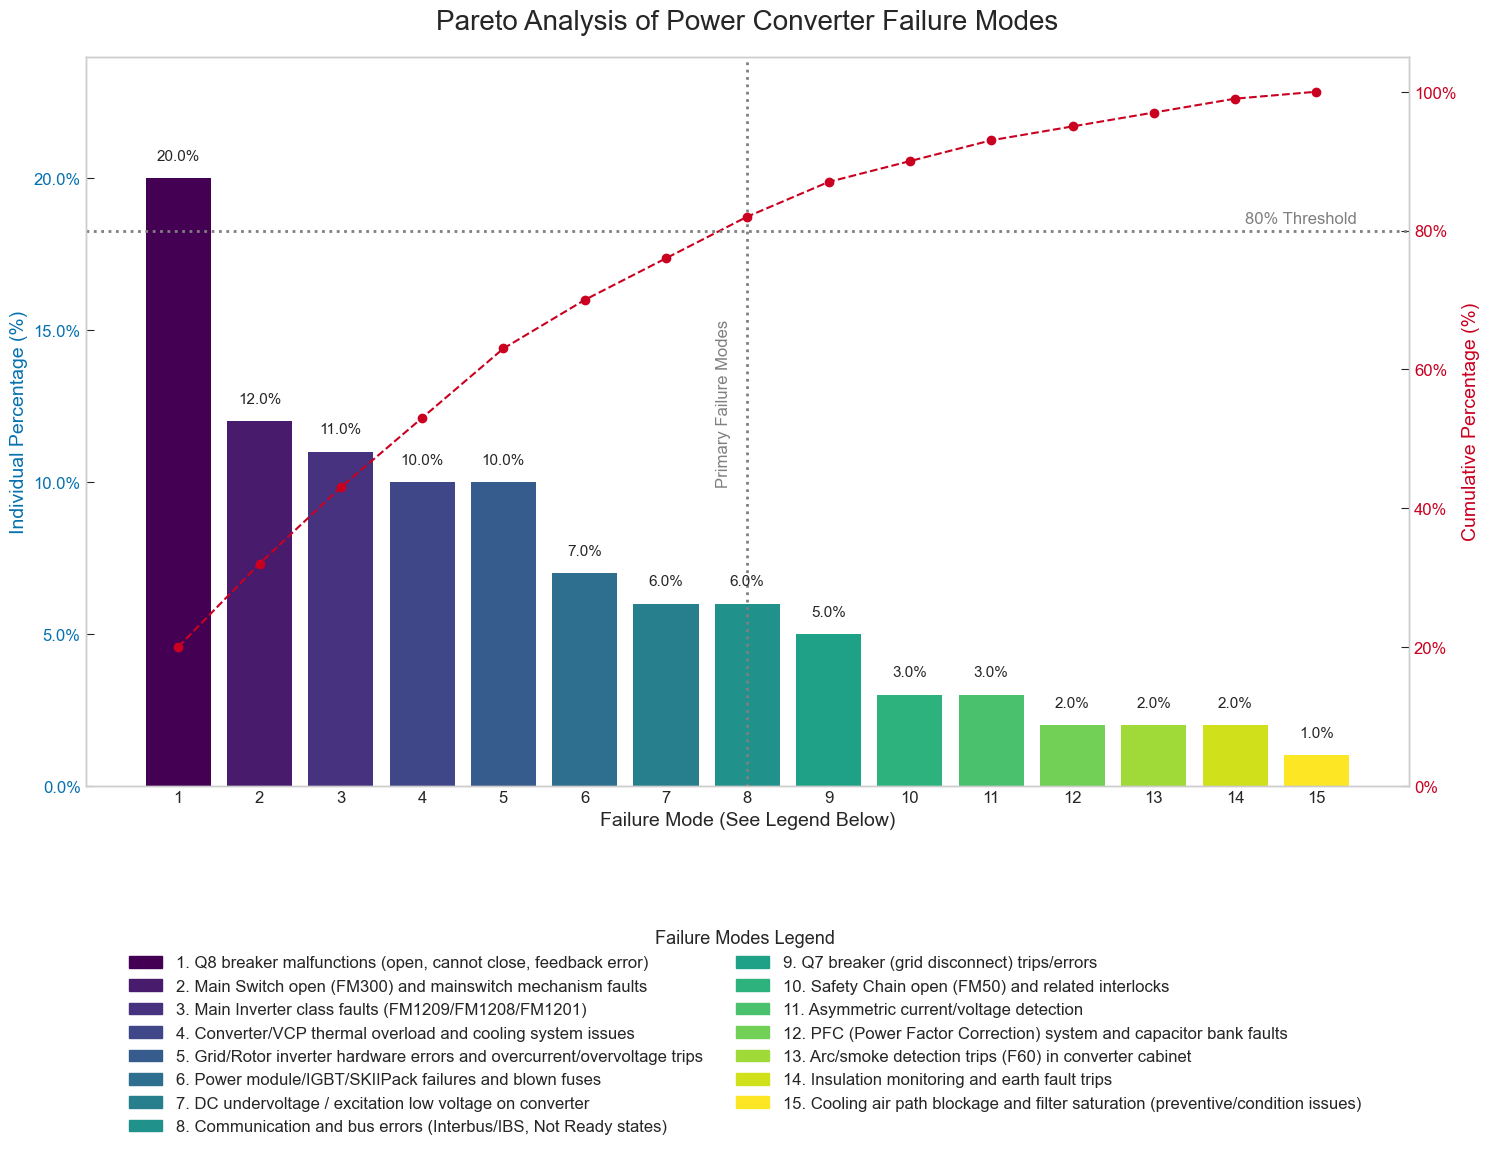

In [10]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- 1. Load and Prepare Data ---

# Load the JSON data from the file.
try:
    with open('converter.json', 'r') as f:
        failure_data = json.load(f)
    print("✅ JSON file 'converter.json' loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'converter.json' not found. Please ensure the file is in the correct directory.")
    failure_data = []

if failure_data:
    # Convert to a pandas DataFrame for easier manipulation.
    df = pd.DataFrame(failure_data)

    # Sort the DataFrame by percentage in descending order for plotting.
    df_sorted = df.sort_values(by='log_percentage', ascending=False).reset_index(drop=True)

    # Create a numbered label for the legend.
    df_sorted['numbered_title'] = [
        f"{i+1}. {title}" for i, title in enumerate(df_sorted['failure_mode_title'])
    ]

    # Calculate the cumulative percentage.
    df_sorted['cumulative_percentage'] = df_sorted['log_percentage'].cumsum()


    # --- 2. Create the Pareto Chart ---

    # Set up the plot style and a single figure.
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.set_title('Pareto Analysis of Power Converter Failure Modes', fontsize=20, pad=20) # Font size for title

    # Define colours for the bars.
    colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))
    
    # Use the index for the x-axis positions.
    x_positions = df_sorted.index

    # Plot the primary bars (individual percentages).
    bars = ax.bar(x_positions, df_sorted['log_percentage'], color=colors)
    
    ax.grid(False)
    
    ax.set_ylabel('Individual Percentage (%)', fontsize=14, color='#0571b0') # Font size for Y-axis label
    
    ax.tick_params(axis='y', labelcolor='#0571b0', labelsize=12, direction='in', length=6) # Font size for Y-axis ticks
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Set the x-ticks to be the numbers.
    ax.set_xticks(x_positions)
    
    ax.set_xticklabels([i+1 for i in x_positions], fontsize=12) # Font size for X-axis ticks
    
    ax.set_xlabel('Failure Mode (See Legend Below)', fontsize=14) # Font size for X-axis label

    # Add percentage labels on top of each bar.
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=11 # Font size for bar labels
        )

    # Create a secondary y-axis for the cumulative line.
    ax_pareto_line = ax.twinx()

    ax_pareto_line.plot(x_positions, df_sorted['cumulative_percentage'], color='#ca0020', marker='o', linestyle='--')
    
    ax_pareto_line.set_ylabel('Cumulative Percentage (%)', fontsize=14, color='#ca0020') # Font size for 2nd Y-axis label
    
    ax_pareto_line.tick_params(axis='y', labelcolor='#ca0020', labelsize=12, direction='in', length=6) # Font size for 2nd Y-axis ticks
    
    ax_pareto_line.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    ax_pareto_line.grid(False)
    
    # Add an 80% line for reference.
    ax_pareto_line.axhline(y=80, color='grey', linestyle=':', linewidth=2)
    ax_pareto_line.text(len(df_sorted)-0.5, 81, '80% Threshold', color='grey', ha='right', fontsize=12) # Font size for threshold label

    # --- Add vertical line at 80% cumulative intersection ---
    try:
        # Find the first index where cumulative percentage crosses 80%
        eighty_percent_index = df_sorted[df_sorted['cumulative_percentage'] >= 80].index[0]
        
        ax.axvline(x=eighty_percent_index, ymax=1, color='grey', linestyle=':', linewidth=2)
        
        # Add a text label indicating the "vital few"
        ax.text(eighty_percent_index - 0.2, ax.get_ylim()[1] * 0.6, 'Primary Failure Modes', 
                rotation=90, ha='right', va='center', color='grey', fontsize=12) # Font size for vertical label
    except IndexError:
        # This will prevent an error if the data never reaches 80%
        print("Cumulative percentage never reached 80%.")
    
    # Set y-axis limits to give labels space.
    ax.set_ylim(0, df_sorted['log_percentage'].max() * 1.2)
    ax_pareto_line.set_ylim(0, 105)

    # Create a legend below the chart.
    legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    fig.legend(handles=legend_handles, labels=df_sorted['numbered_title'].tolist(), 
               loc='upper center', bbox_to_anchor=(0.5, 0.08), ncol=2, 
               title="Failure Modes Legend",
               fontsize=12,           # Font size for legend items
               title_fontsize=13)   # Font size for legend title

    # Adjust layout to make space for legend.
    plt.tight_layout(rect=[0, 0.15, 1, 1]) 
    plt.show()

### 1.4. Interpretation
The Pareto analysis clearly shows a concentrated failure distribution, consistent with the 80/20 principle. 

* The most frequent issue, **"Q8 breaker malfunction"**, accounts for around **20%** of all maintenance events for this component.
* The **top eight most common failure modes** collectively represent around **80%** of all logged events, indicating that a small number of recurring problems are the primary drivers of corrective maintenance for the power converter in this fleet.

**Parsing the JSON of Response 1 using Python for display as a Markdown table:**

In [ ]:
import json
import pandas as pd
from tabulate import tabulate

# --- 1. Load and Prepare Data ---

# Load the JSON data from the file.
try:
    with open('converter.json', 'r') as f:
        failure_data = json.load(f)
    print("✅ JSON file 'converter.json' loaded successfully.\n")
except FileNotFoundError:
    print("❌ Error: 'converter.json' not found. Please ensure the file is in the correct directory.")
    failure_data = []

if failure_data:
    # Convert to a pandas DataFrame.
    df = pd.DataFrame(failure_data)

    # Sort the DataFrame by percentage in descending order.
    df_sorted = df.sort_values(by='log_percentage', ascending=False).reset_index(drop=True)

    # --- 2. Create the Markdown Table ---

    # Add a 'Rank' column.
    df_sorted.insert(0, 'Rank', df_sorted.index + 1)
    
    # Format the log percentage column to include the '%' symbol.
    df_sorted['log_percentage'] = df_sorted['log_percentage'].apply(lambda x: f"{x:.1f}%")

    # Select and rename the columns for the final table.
    table_df = df_sorted[[
        'Rank',
        'failure_mode_title',
        'failure_mode_description',
        'log_percentage'
    ]]
    
    table_df.columns = [
        'Rank',
        'Failure Mode',
        'Description',
        'Log Count (%)'
    ]
    
    # Generate the Markdown table using the 'tabulate' library.
    # The 'pipe' format is standard for GitHub-Flavored Markdown.
    markdown_table = tabulate(
        table_df, 
        headers='keys', 
        tablefmt='pipe', 
        showindex=False
    )
    
    # Print the resulting table.
    # In a Jupyter Notebook, you can also display it using display(Markdown(markdown_table))
    # after importing from IPython.display import display, Markdown
    print(markdown_table)

|   Rank | Failure Mode                                                                  | Description                                                                                                                                                       | Log Count (%)   |
|-------:|:------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------|
|      1 | Q8 breaker malfunctions (open, cannot close, feedback error)                  | Frequent trips or command failures of the Q8 breaker due to feedback faults or mechanical/electrical issues cause the converter to disconnect or fail to reclose. | 20.0%           |
|      2 | Main Switch open (FM300) and mainswitch mechanism faults                      | The LV MainSwitch opens or fails to latch/close (often FM300) leading to converter de-energisation and repeated downtime, sometimes due to mechanical issues.     | 12.0%           |
|      3 | Main Inverter class faults (FM1209/Fm1208/FM1201)                             | Main Inverter reports Class C/B/A faults indicating internal converter protection trips tied to hardware condition, insulation or thermal/operational thresholds. | 11.0%           |
|      4 | Converter/VCP thermal overload and cooling system issues                      | Over-temperature alarms on the VCP/PowerCab/Busbar and cooling system faults or clogged filters trigger converter derating or trips.                              | 10.0%           |
|      5 | Grid/Rotor inverter hardware errors and overcurrent/overvoltage trips         | Hardware errors and protection trips on grid/rotor inverter stages (overcurrent, HW error, OVP) intermittently shut down the converter.                           | 10.0%           |
|      6 | Power module/IGBT/SKIIPack failures and blown fuses                           | Failures of power modules (SKIIPacks/phase modules) and IGBTs, often accompanied by blown fuses, require hardware replacement and cause trips.                    | 7.0%            |
|      7 | DC undervoltage / excitation low voltage on converter                         | Low DC or excitation voltage conditions on the converter DC link or rotor excitation path cause trips and not-ready states.                                       | 6.0%            |
|      8 | Communication and bus errors (Interbus/IBS, Not Ready states)                 | Communication faults (e.g., Interbus FM700) and converter 'not ready' statuses interrupt inverter control and lead to stops.                                      | 6.0%            |
|      9 | Q7 breaker (grid disconnect) trips/errors                                     | Q7 breaker opens or reports errors, preventing grid connection and causing converter shutdowns.                                                                   | 5.0%            |
|     10 | Safety Chain open (FM50) and related interlocks                               | The safety chain is activated (FM50), opening interlocks that prevent converter operation until reset and root cause resolution.                                  | 3.0%            |
|     11 | Asymmetric current/voltage detection                                          | Protection trips caused by phase asymmetry in current or voltage indicate imbalance or measurement/contact issues in the converter path.                          | 3.0%            |
|     12 | PFC (Power Factor Correction) system and capacitor bank faults                | PFC breaker trips (79) and capacitor bank failures or replacements indicate reactive power circuit issues affecting converter operation.                          | 2.0%            |
|     13 | Arc/smoke detection trips (F60) in converter cabinet                          | Smoke or arc detection triggers protective opening (F60/Q8) and shuts down the converter for safety.                                                              | 2.0%            |
|     14 | Insulation monitoring and earth fault trips                                   | Insulation monitor trips and earth fault detections on the LV side stop the converter until insulation issues are cleared.                                        | 2.0%            |
|     15 | Cooling air path blockage and filter saturation (preventive/condition issues) | Clogged or degraded converter air filters and air path components reduce cooling effectiveness, contributing to thermal trips and derating.                       | 1.0%            |

### 1.5. Task 1 Conclusion
This workflow successfully demonstrated the LLM's ability to act as an analytical assistant. It transformed over a thousand raw text entries into a prioritised list of distinct failure modes, complete with clear descriptions. This output provides an immediate, data-driven basis for focusing reliability engineering efforts on the most impactful issues.

## Task 2: Inferring Causal Chains

### 2.1. Objective
This task evaluates the LLM's ability to perform more complex reasoning by inferring potential root causes from a chronological sequence of events. A single turbine with a high frequency of maintenance events (92 logs) was selected for this in-depth analysis. The goal is to determine if the model can identify plausible causal relationships between different maintenance actions over time.

### 2.2. LLM Prompt
To infer potential causal links, the LLM was assigned the role of a lead Diagnostic Engineer and given the full chronological maintenance history for the selected turbine. The prompt required the model to identify event sequences, formulate a plausible hypothesis for each, and assign a confidence level to its inference.

**Prompt for the LLM:**

In [ ]:
# ROLE:
You are a lead Diagnostic Engineer and a specialist in Root Cause Analysis (RCA) for complex industrial assets such as wind turbines with proficiency in identifying cascading failures from chronological event data.

# CONTEXT:
The provided data is a complete, chronologically sorted list of all maintenance logs for a single wind turbine. Each log has a unique 'WONUM' (Work Number ID), an 'Event Date', a 'Component Name', as well as the 'Description' and 'Observations' fields (written in Portugese). Your task is to identify potential causal chains where an issue in one component may have contributed to a subsequent issue in another.

# TASK:
1.  Review the entire sequence of maintenance logs provided.
2.  Identify any potential causal chains, defined as a sequence of two or more events where the text suggests a plausible physical relationship between them.
3.  For each chain identified, construct a likely hypothesis explaining the connection.
4.  Assess your confidence in the inferred causal link (Low, Medium, or High).
5.  Present your findings as a single JSON object in a code block.

# INPUT DATA:
See the attached `turbine_subset.csv` file.

# OUTPUT JSON FORMAT:
Each object in the array represents a potential causal chain and must follow this exact structure:
```json
[
  {
    "causal_chain_title": "Causal Chain Title N",
    "sequence_of_events": [
      {
        "log_id": "<ID of the first event>",
        "component": "<Component Name of the first event>",
        "summary": "<A brief summary of the first log's description>"
      },
      {
        "log_id": "<ID of the subsequent event>",
        "component": "<Component Name of the subsequent event>",
        "summary": "<A brief summary of the subsequent log's description>"
      }
    ],
    "hypothesis": "An expert hypothesis explaining the causal relationship.",
    "confidence": "<'Low', 'Medium', or 'High'>"
  }
]
```

### 2.3. LLM Response & Results Synthesis
The model returned a JSON object detailing twelve potential causal chains. The Python code below parses this data and plots the events on both an interactive and a static timeline to visualise their temporal relationships. The interactive version is available in the final version of this repository.

**Response 2: OpenAI GPT 5, T = 0.5, 92 logs (small sample):**

In [12]:
# Python elements added for saving as JSON

turbine_json = '''
[
  {
    "causal_chain_title": "Persistent rotor speed sensing faults leading to TCS power/interference fixes",
    "sequence_of_events": [
      {
        "log_id": "607364",
        "component": "Rotor Bearing System",
        "summary": "Replaced rotor speed sensor"
      },
      {
        "log_id": "607365",
        "component": "Rotor Bearing System",
        "summary": "Adjusted new rotor speed sensor"
      },
      {
        "log_id": "607453",
        "component": "Turbine Control System",
        "summary": "Replaced FR1 in controller"
      },
      {
        "log_id": "614464",
        "component": "Turbine Control System",
        "summary": "Replaced power supply in top box"
      },
      {
        "log_id": "616121",
        "component": "Rotor Bearing System",
        "summary": "Replaced rotor speed sensor again"
      },
      {
        "log_id": "616359",
        "component": "Rotor Bearing System",
        "summary": "Replaced cable of the rotor speed sensor"
      },
      {
        "log_id": "622867",
        "component": "Rotor Bearing System",
        "summary": "Replaced cable of the rotor speed sensor"
      },
      {
        "log_id": "622881",
        "component": "Rotor Bearing System",
        "summary": "Mechanical adjustment of rotor speed sensor"
      },
      {
        "log_id": "724078",
        "component": "Rotor Bearing System",
        "summary": "Further tuning of rotor speed sensor"
      }
    ],
    "hypothesis": "Intermittent or noisy rotor speed feedback due to damaged cabling or poor sensor alignment likely caused repeated faults; power quality or controller issues were addressed by replacing the top box PSU and FR1, while repeated cable replacements and mechanical adjustments ultimately targeted the true root cause in wiring and alignment.",
    "confidence": "High"
  },
  {
    "causal_chain_title": "Hydraulic oil leak leading to rotor brake pump deactivation and replacement",
    "sequence_of_events": [
      {
        "log_id": "1019622",
        "component": "Central Hydraulic System",
        "summary": "Oil leak in hydraulic central piping"
      },
      {
        "log_id": "1003405",
        "component": "Brake System Drive Train ",
        "summary": "Deactivated rotor brake pump"
      },
      {
        "log_id": "1003406",
        "component": "Brake System Drive Train ",
        "summary": "Replaced rotor brake pump"
      }
    ],
    "hypothesis": "Loss of hydraulic fluid and pressure from the central system leak degraded rotor brake pump performance, necessitating pump shutdown and subsequent replacement to restore braking capability.",
    "confidence": "High"
  },
  {
    "causal_chain_title": "Interbus communication degradation across fibre, module, and protection",
    "sequence_of_events": [
      {
        "log_id": "739721",
        "component": "Turbine Control System",
        "summary": "FM700 error cleared by local reset"
      },
      {
        "log_id": "739722",
        "component": "Turbine Control System",
        "summary": "Swapped Interbus fibre optic pairs"
      },
      {
        "log_id": "817415",
        "component": "Turbine Control System",
        "summary": "Replaced Interbus module"
      },
      {
        "log_id": "1098846",
        "component": "Turbine Control System",
        "summary": "Replaced Interbus module fuse in top box"
      }
    ],
    "hypothesis": "Persistent Interbus network faults progressed from transient resets to physical layer interventions (fibre pair swap), then to hardware replacement and protection component (fuse) replacement, indicating underlying comms path degradation and/or intermittent power issues affecting the fieldbus.",
    "confidence": "Medium-High"
  },
  {
    "causal_chain_title": "Chronic rotor brake hydraulic issues culminating in repeated pump work",
    "sequence_of_events": [
      {
        "log_id": "638576",
        "component": "Brake System Drive Train ",
        "summary": "Bypass implemented on rotor brake pump"
      },
      {
        "log_id": "638577",
        "component": "Brake System Drive Train ",
        "summary": "Replaced rotor brake pump"
      },
      {
        "log_id": "817148",
        "component": "Brake System Drive Train ",
        "summary": "Replaced pads in rotor brake pumps"
      },
      {
        "log_id": "1003405",
        "component": "Brake System Drive Train ",
        "summary": "Deactivated rotor brake pump"
      },
      {
        "log_id": "1003406",
        "component": "Brake System Drive Train ",
        "summary": "Replaced rotor brake pump"
      }
    ],
    "hypothesis": "Contamination or wear in the hydraulic circuit likely drove recurrent pump and brake component degradation, first requiring bypass and replacement, later pad renewal, and again deactivation and replacement—consistent with a systemic hydraulic issue later compounded by the central hydraulic leak.",
    "confidence": "Medium"
  },
  {
    "causal_chain_title": "Blade 2 pitch control instability leading to inverter, PSU, and redundancy replacements",
    "sequence_of_events": [
      {
        "log_id": "482008",
        "component": "Rotor Blade No. 2",
        "summary": "Local reset to pitch controller 2"
      },
      {
        "log_id": "482044",
        "component": "Rotor Blade No. 2",
        "summary": "Error 1117 reset on pitch controller 2"
      },
      {
        "log_id": "482071",
        "component": "Rotor Blade No. 2",
        "summary": "Error 1111 reset on pitch system 2"
      },
      {
        "log_id": "482074",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced pitch inverter on blade 2"
      },
      {
        "log_id": "497411",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced 24 V power supply of pitch system"
      },
      {
        "log_id": "497439",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced pitch redundancy for blade 2"
      }
    ],
    "hypothesis": "Repeated controller errors indicate deteriorating pitch inverter and low-voltage supply performance on blade 2; replacing the inverter, 24 V PSU, and redundancy module addressed cascading control faults.",
    "confidence": "High"
  },
  {
    "causal_chain_title": "Blade 2 pitch mechanical degradation following early electrical instability",
    "sequence_of_events": [
      {
        "log_id": "544555",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced blade 2 bearing (B)"
      },
      {
        "log_id": "575936",
        "component": "Rotor Blade No. 2",
        "summary": "Lubricated blade 2 bearing"
      },
      {
        "log_id": "575937",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced brake of blade 2 pitch motor"
      },
      {
        "log_id": "575943",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced pitch inverter on blade 2"
      },
      {
        "log_id": "623057",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced pitch brake on blade 2"
      },
      {
        "log_id": "724023",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced pitch brake on blade 2"
      }
    ],
    "hypothesis": "Earlier pitch drive control faults likely caused abnormal torque cycling and thermal stress, accelerating wear of the blade 2 pitch bearing and brake, leading to repeated lubrication and brake replacements alongside another inverter swap.",
    "confidence": "Medium"
  },
  {
    "causal_chain_title": "Cross-blade pinion bolt and pinion failures indicating systemic overload or torque issues",
    "sequence_of_events": [
      {
        "log_id": "801628",
        "component": "Rotor Blade No. 2",
        "summary": "Detected three broken bolts on blade 2"
      },
      {
        "log_id": "902982",
        "component": "Rotor Blade No. 3",
        "summary": "Replaced attack pinion on blade 3"
      },
      {
        "log_id": "934380",
        "component": "Rotor Blade No. 3",
        "summary": "Replaced blade pinion bolts"
      },
      {
        "log_id": "934536",
        "component": "Rotor Blade No. 1",
        "summary": "Replaced blade pinion bolts"
      },
      {
        "log_id": "934535",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced blade pinion bolts"
      },
      {
        "log_id": "965493",
        "component": "Rotor Blade No. 3",
        "summary": "Detected broken pinion bolt on blade 3"
      },
      {
        "log_id": "965494",
        "component": "Rotor Blade No. 3",
        "summary": "Replaced attack pinion on blade 3"
      }
    ],
    "hypothesis": "Repeated fastener and pinion failures across multiple blades suggest excessive or shock loading in the pitch drivetrain, potentially from aggressive pitch torque profiles or miscalibration, prompting a cross-blade bolt replacement campaign yet recurring failures on blade 3.",
    "confidence": "Medium"
  },
  {
    "causal_chain_title": "Blade 2 post-repair control and mechanical follow-up leading to gearbox shaft tip replacement",
    "sequence_of_events": [
      {
        "log_id": "934535",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced blade 2 pinion bolts"
      },
      {
        "log_id": "965495",
        "component": "Rotor Blade No. 2",
        "summary": "Adjusted pitch redundancy on blade 2 after drift"
      },
      {
        "log_id": "965618",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced contactor of pitch 2"
      },
      {
        "log_id": "965619",
        "component": "Rotor Blade No. 2",
        "summary": "Checked pitch 2 motor backlash"
      },
      {
        "log_id": "1114870",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced screw on pitch gearbox of blade 2"
      },
      {
        "log_id": "1131160",
        "component": "Rotor Blade No. 2",
        "summary": "Replaced tip of pitch gearbox shaft 2"
      }
    ],
    "hypothesis": "After mechanical work on pinion bolts, control redundancy required recalibration and electrical components showed degradation; continued mechanical stress ultimately propagated to the pitch gearbox output, necessitating screw replacement and later shaft tip replacement.",
    "confidence": "Medium"
  },
  {
    "causal_chain_title": "Generator speed feedback issue culminating in encoder and interface replacement",
    "sequence_of_events": [
      {
        "log_id": "376199",
        "component": "Generator 1",
        "summary": "Replaced rotation monitor"
      },
      {
        "log_id": "481462",
        "component": "Converter System Generator 1",
        "summary": "Replaced encoder interface board in converter"
      },
      {
        "log_id": "481473",
        "component": "Generator 1",
        "summary": "Replaced generator encoder"
      }
    ],
    "hypothesis": "Initial generator speed monitoring problems progressed to replacing both the encoder and its converter-side interface, indicating a degraded measurement chain rather than a single-point failure.",
    "confidence": "Medium"
  },
  {
    "causal_chain_title": "Yaw brake relay replacement followed by system tuning",
    "sequence_of_events": [
      {
        "log_id": "770717",
        "component": "Yaw Brake System",
        "summary": "Replaced timed relay of yaw brakes"
      },
      {
        "log_id": "786081",
        "component": "Yaw Brake System",
        "summary": "Tuned yaw brakes"
      }
    ],
    "hypothesis": "Replacing the timing relay altered brake application timing and response, necessitating a follow-up tuning to restore correct yaw brake behaviour.",
    "confidence": "High"
  },
  {
    "causal_chain_title": "Yaw drive grease retention modifications preceding brake adjustments and sensor calibration",
    "sequence_of_events": [
      {
        "log_id": "918491",
        "component": "Yaw Drive System",
        "summary": "Installed fibre kit on yaw system"
      },
      {
        "log_id": "918375",
        "component": "Yaw Drive System",
        "summary": "Applied fibre kit to retain grease in yaw"
      },
      {
        "log_id": "1003349",
        "component": "Yaw Brake System",
        "summary": "Adjusted brakes of yaw motors"
      },
      {
        "log_id": "1082926",
        "component": "Yaw Brake System",
        "summary": "Adjusted microswitch sensor of yaw brakes"
      }
    ],
    "hypothesis": "Grease retention modifications may have altered friction and drag characteristics in the yaw drive, later prompting brake setting adjustments and microswitch recalibration to maintain proper engagement and signalling.",
    "confidence": "Low-Medium"
  },
  {
    "causal_chain_title": "Gearbox bearing distress leading to full gearbox replacement",
    "sequence_of_events": [
      {
        "log_id": "312320",
        "component": "Gearbox",
        "summary": "HSS bearing BPFI issue follow-up"
      },
      {
        "log_id": "426354",
        "component": "Gearbox",
        "summary": "Gearbox replacement"
      }
    ],
    "hypothesis": "Early indication of high-speed shaft bearing damage (BPFI) progressed to a decision to replace the gearbox within the year to prevent catastrophic failure.",
    "confidence": "High"
  }
]
'''
  
with open('turbine.json', 'w') as f:
    f.write(turbine_json)

print("The JSON data has been saved to 'turbine.json'")

The JSON data has been saved to 'turbine.json'


**Parsing the JSON of Response 2 using Python for plotting:**

In [ ]:
import json
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import textwrap

# --- 1. Load and Prepare Data ---

# Load the LLM's analysis of causal chains.
try:
    with open('turbine.json', 'r') as f:
        causal_chains = json.load(f)
    print("✅ JSON file 'turbine.json' loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'turbine.json' not found.")
    causal_chains = []

# Load the original turbine data to get the event dates.
try:
    df_turbine_subset = pd.read_csv('turbine_subset.csv') # not included in repo due to data privacy
    df_turbine_subset['Event Date'] = pd.to_datetime(df_turbine_subset['Event Date'])
    df_turbine_subset.rename(columns={'WONUM': 'log_id'}, inplace=True)
    print("✅ CSV file 'turbine_subset.csv' loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'turbine_subset.csv' not found.")
    df_turbine_subset = pd.DataFrame()

if causal_chains and not df_turbine_subset.empty:
    # --- 2. Create the Interactive Scatter Timeline ---

    # Create the figure object.
    fig = go.Figure()

    # Get a sorted list of unique components.
    all_components = sorted(list(set(event['component'] for chain in causal_chains for event in chain['sequence_of_events'])))
    
    # --- Define a manual color map ---
    # List of 12 distinct, high-contrast hex color codes.
    manual_colors = [
        '#1f77b4',  # Muted Blue
        '#ff7f0e',  # Safety Orange
        '#2ca02c',  # Cooked Asparagus Green
        '#d62728',  # Brick Red
        '#9467bd',  # Muted Purple
        '#8c564b',  # Chestnut Brown
        '#e377c2',  # Barbie Pink
        '#7f7f7f',  # Middle Grey
        '#bcbd22',  # Dirty Yellow-Green
        '#17becf',  # Muted Cyan
        '#000000',  # Black
        '#4B0082'   # Indigo
    ]
    
    # Create a dictionary mapping each component name to a specific color.
    color_map = {component: manual_colors[i] for i, component in enumerate(all_components)}
    # ---------------------------------------------------

    # Create short names for the y-axis and map them to y-positions.
    chain_titles = [c['causal_chain_title'] for c in causal_chains]
    y_positions = {title: i for i, title in enumerate(chain_titles)}
    
    short_y_labels = {title: str(i + 1) for i, title in enumerate(chain_titles)}

    # Process each chain to plot events and connecting lines.
    for chain_title, y_pos in y_positions.items():
        chain = next((c for c in causal_chains if c['causal_chain_title'] == chain_title), None)
        if not chain:
            continue
        
        # Prepare richer hover text.
        wrapped_hypothesis = '<br>'.join(textwrap.wrap(chain['hypothesis'], width=80))
        event_dates, hover_texts, event_components = [], [], []

        for event in sorted(chain['sequence_of_events'], key=lambda x: int(x['log_id'])):
            log_details = df_turbine_subset[df_turbine_subset['log_id'] == int(event['log_id'])]
            if not log_details.empty:
                event_date = log_details['Event Date'].iloc[0]
                event_dates.append(event_date)
                event_components.append(event['component'])
                
                hover_texts.append(
                    f"<b>Chain {short_y_labels[chain_title]}: {chain_title}</b><br>" +
                    f"<b>Hypothesis:</b> {wrapped_hypothesis}<br>" +
                    f"<b>Component:</b> {event['component']}<br>" +
                    f"<b>Date:</b> {event_date.strftime('%Y-%m-%d')}<br>" +
                    f"<b>Log ID:</b> {event['log_id']}<br>" +
                    f"<b>Summary:</b> {event['summary']}"
                )
        
        fig.add_trace(go.Scatter(
            x=event_dates, y=[y_pos] * len(event_dates), mode='lines',
            line=dict(color='lightgrey', width=2), showlegend=False, hoverinfo='none'
        ))

        # Add the event markers.
        fig.add_trace(go.Scatter(
            x=event_dates, y=[y_pos] * len(event_dates), mode='markers',
            marker=dict(size=12, symbol='diamond',
                        color=[color_map[comp] for comp in event_components]),
            hoverinfo='text', hovertext=hover_texts, showlegend=False
        ))

    # --- 3. Create a Custom Legend ---
    for component in all_components:
        fig.add_trace(go.Scatter(
            x=[None], y=[None], mode='markers',
            marker=dict(size=10, symbol='diamond',
                        color=color_map[component]),
            name=component
        ))

    # --- 4. Update Figure Layout ---
    fig.update_layout(
        title={'text': 'Interactive Timeline of Inferred Causal Chains for the Observed Turbine', 'y':0.95, 'x':0.5, 'xanchor': 'center'},
        xaxis_title='Timeline',
        yaxis=dict(
            title='Hypothesised Causal Chain No.',
            tickmode='array',
            tickvals=list(y_positions.values()),
            ticktext=list(short_y_labels.values())
        ),
        legend_title_text='Wind Turbine Subsystems',
        height=800,
        hovermode='closest',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.25,
            xanchor="center",
            x=0.5
        )
    )
    
    fig.write_html("interactive_timeline.html")
    print("✅ Interactive chart saved to interactive_timeline.html")

✅ JSON file 'turbine.json' loaded successfully.
✅ CSV file 'turbine_subset.csv' loaded successfully.
✅ Interactive chart saved to interactive_timeline.html


**The produced interractive chart is available here:** [Interactive Timeline of Inferred Causal Chains for the Observed Turbine](https://mvmalyi.github.io/llm-semantic-maintenance-logs-analysis/interactive_timeline.html)

### 2.4. Interpretation
The model successfully identified twelve potential causal chains with varying confidence levels. The timeline in Figure 2 visualises these inferred relationships.

-   A compelling, **high-confidence example** is **Chain 9**, which details a generator speed feedback issue. The LLM identified a clear progression over several months: an initial replacement of a rotation monitor, followed by the replacement of the encoder interface board in the converter, and culminating in the replacement of the generator encoder itself. The model's hypothesis—that this sequence indicates a *degraded measurement chain* rather than a single-point failure—is a plausible engineering diagnosis.

-   In contrast, other chains, such as **Chain 11** (linking yaw drive grease retention to subsequent brake adjustments), were assigned a **lower confidence level**, suggesting a more tenuous correlation that would require significant expert validation. This demonstrates the model's ability to not only generate hypotheses but also to express uncertainty.

### 2.5. Task 2 Conclusion
This task demonstrated the LLM's advanced reasoning capability. It moved beyond static event grouping to generate dynamic, testable hypotheses about root causes from sequential data. This showcases its potential as a "co-pilot" tool for accelerating diagnostic investigations by providing engineers with plausible, contextualised starting points for their analysis.

**Parsing the JSON of Response 2 using Python for plotting (a static chart version for the paper):**

✅ JSON file 'turbine.json' loaded successfully.
✅ CSV file 'turbine_subset.csv' loaded successfully.


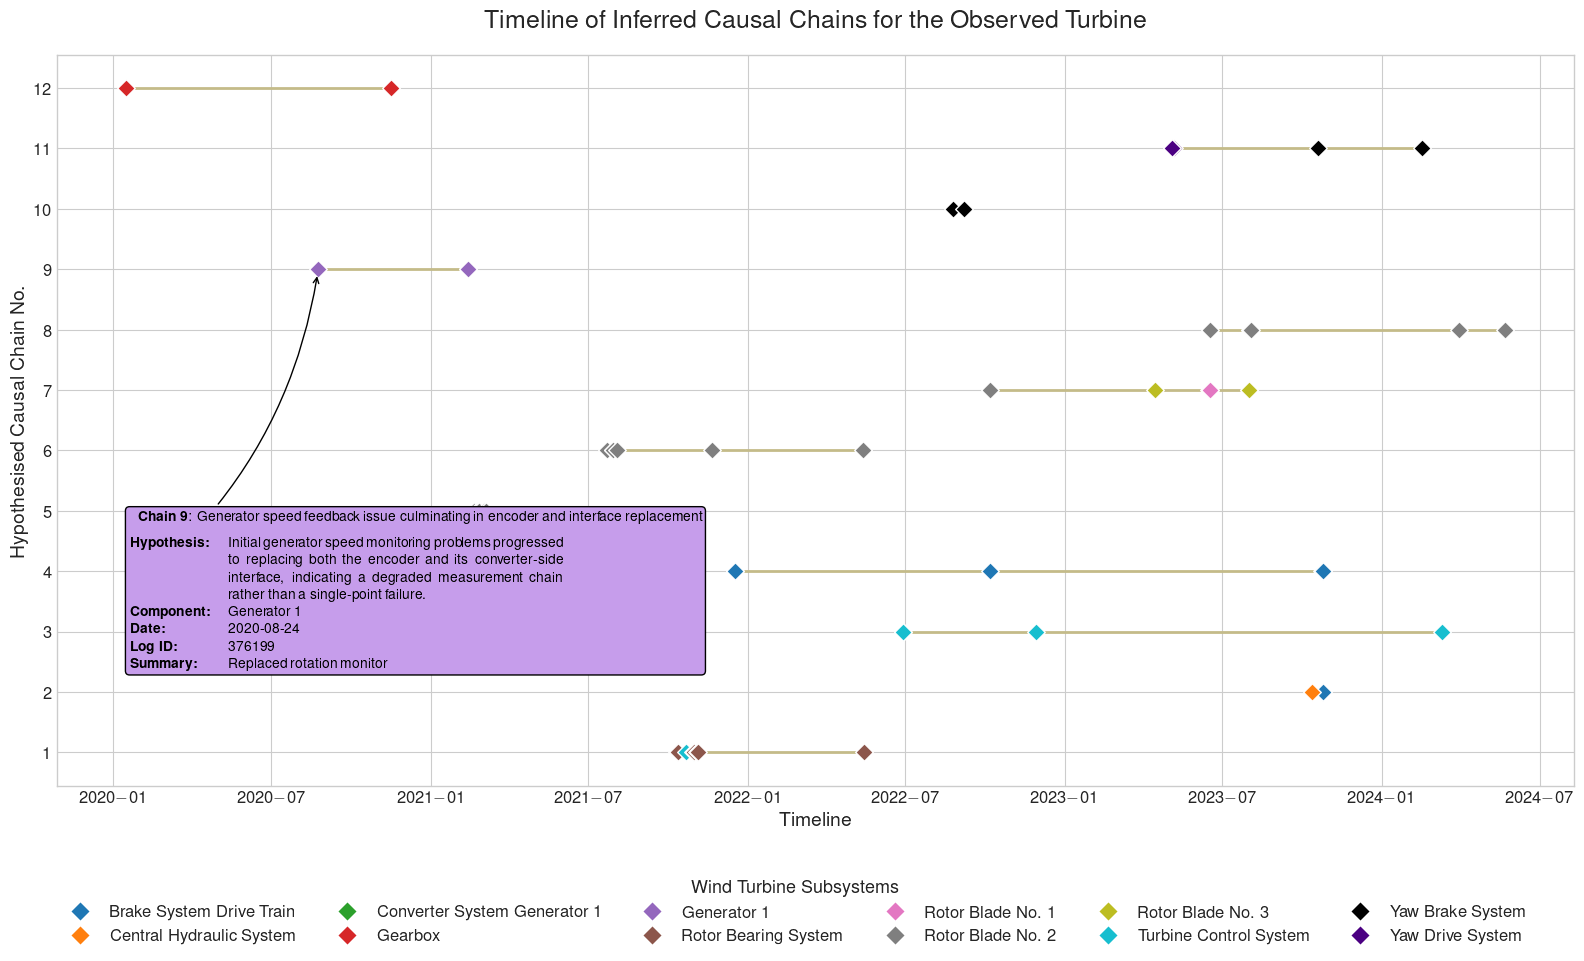

In [15]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
from datetime import datetime

# --- 1. Load and Prepare Data ---

# Load the LLM's analysis of causal chains.
try:
    with open('turbine.json', 'r') as f:
        causal_chains = json.load(f)
    print("✅ JSON file 'turbine.json' loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'turbine.json' not found.")
    causal_chains = []

# Load the original turbine data to get the event dates.
try:
    df_turbine_subset = pd.read_csv('turbine_subset.csv')
    df_turbine_subset['Event Date'] = pd.to_datetime(df_turbine_subset['Event Date'])
    df_turbine_subset.rename(columns={'WONUM': 'log_id'}, inplace=True)
    print("✅ CSV file 'turbine_subset.csv' loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'turbine_subset.csv' not found.")
    df_turbine_subset = pd.DataFrame()

if causal_chains and not df_turbine_subset.empty:
    # --- 2. Setup for Static Matplotlib Chart ---

    # Get a sorted list of unique components.
    all_components = sorted(list(set(event['component'] for chain in causal_chains for event in chain['sequence_of_events'])))
    
    # Define the same manual color map for consistency.
    manual_colors = [
        '#1f77b4',  # Muted Blue (Central Hydraulic System)
        '#ff7f0e',  # Safety Orange (Control System)
        '#2ca02c',  # Cooked Asparagus Green (Drive Train Brake System)
        '#d62728',  # Brick Red (Gearbox)
        '#9467bd',  # Muted Purple (Generator)
        '#8c564b',  # Chestnut Brown (Power Converter)
        '#e377c2',  # Barbie Pink (Rotor Bearings)
        '#7f7f7f',  # Middle Grey (Rotor Blade No. 1)
        '#bcbd22',  # Dirty Yellow-Green (Rotor Blade No. 2)
        '#17becf',  # Muted Cyan (Rotor Blade No. 3)
        '#000000',  # Black (Yaw Brake System)
        '#4B0082'   # Indigo (Yaw Drive System)
    ]
    color_map = {component: manual_colors[i] for i, component in enumerate(all_components)}

    # Map chain titles to y-axis positions and numbers.
    chain_titles = [c['causal_chain_title'] for c in causal_chains]
    y_positions = {title: i for i, title in enumerate(chain_titles)}
    chain_numbers = {title: i + 1 for i, title in enumerate(chain_titles)}

    # --- 3. Create the Static Plot ---

    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Configure LaTeX to use a sans-serif font (Helvetica).
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "sans-serif",
        "text.latex.preamble": r"\usepackage{helvet}\usepackage{sansmath}\sansmath"
    })
    
    fig, ax = plt.subplots(figsize=(16, 10))

    # Process each chain to plot events and connecting lines.
    for chain_title, y_pos in y_positions.items():
        chain = next((c for c in causal_chains if c['causal_chain_title'] == chain_title), None)
        if not chain:
            continue
        
        event_dates, event_components = [], []

        for event in sorted(chain['sequence_of_events'], key=lambda x: int(x['log_id'])):
            log_details = df_turbine_subset[df_turbine_subset['log_id'] == int(event['log_id'])]
            if not log_details.empty:
                event_dates.append(log_details['Event Date'].iloc[0])
                event_components.append(event['component'])
        
        if event_dates:
            ax.plot(event_dates, [y_pos] * len(event_dates), color='#c4bb89', linestyle='-', linewidth=2, zorder=1)
        
        for date, comp in zip(event_dates, event_components):
            ax.scatter(date, y_pos, marker='D', s=80, color=color_map[comp], zorder=2, ec='white')

    # --- 4. Create the Example Annotation (Improved) ---

    chain_to_annotate_num = 9
    chain_to_annotate_title = 'Generator speed feedback issue culminating in encoder and interface replacement'
    target_log_id = 376199

    chain_data = next((c for c in causal_chains if c['causal_chain_title'] == chain_to_annotate_title), None)

    if chain_data:
        annotation_event = next((e for e in chain_data['sequence_of_events'] if int(e['log_id']) == target_log_id), None)
        
        if annotation_event:
            annotation_event_details = df_turbine_subset[df_turbine_subset['log_id'] == int(annotation_event['log_id'])]
            
            if not annotation_event_details.empty:
                point_to_x = annotation_event_details['Event Date'].iloc[0]
                point_to_y = y_positions[chain_to_annotate_title]

                # 1. Prepare text components for the annotation.
                hypothesis_text = chain_data['hypothesis'].replace('&', r'\&')
                component_text = annotation_event['component']
                date_text = point_to_x.strftime('%Y-%m-%d')
                log_id_text = str(annotation_event['log_id'])
                summary_text = annotation_event['summary']
                
                # 2. Build the annotation string using a LaTeX tabular environment.
                # The 'p{width}' column type automatically wraps text without indenting
                # subsequent lines, and the width has been increased to 8.5cm.
                annotation_text = (
                    r"\begin{tabular}{@{} l p{8.5cm} @{}}"
                    fr"\multicolumn{{2}}{{l}}{{\textbf{{Chain {chain_to_annotate_num}}}: {chain_to_annotate_title}}}\\[6pt]" # Moved chain title here
                    fr"\textbf{{Hypothesis:}} & {hypothesis_text}\\"
                    fr"\textbf{{Component:}} & {component_text}\\"
                    fr"\textbf{{Date:}} & {date_text}\\"
                    fr"\textbf{{Log ID:}} & {log_id_text}\\"
                    fr"\textbf{{Summary:}} & {summary_text}"
                    r"\end{tabular}"
                )
                
                # 3. Create the annotation with updated positioning and styling.
                ax.annotate(
                    annotation_text,
                    xy=(point_to_x, point_to_y),
                    xytext=(datetime(2020, 1, 20), 4.0), # Positioned in the "safe zone"
                    ha="left", va="top",
                    color='black',
                    bbox=dict(boxstyle="round,pad=0.3", fc='#c69deb', ec="black", lw=1),
                    arrowprops=dict(
                        arrowstyle="->",
                        connectionstyle="arc3,rad=0.2",
                        facecolor="black",
                        shrinkB=5,
                        relpos=(0, 0.5)
                    ),
                    fontsize=10
                )

    # --- 5. Finalise Layout, Legend, and Titles ---
    ax.set_title('Timeline of Inferred Causal Chains for the Observed Turbine', fontsize=18, pad=20)
    ax.set_xlabel('Timeline', fontsize=14)
    ax.set_ylabel('Hypothesised Causal Chain No.', fontsize=14)
    ax.set_yticks(list(y_positions.values()))
    ax.set_yticklabels([chain_numbers[ct] for ct in chain_titles], fontsize=12)
    ax.tick_params(axis='x', labelsize=12)

    legend_handles = [plt.Line2D([0], [0], marker='D', color='w', label=comp,
                                 markerfacecolor=color, markersize=10) for comp, color in color_map.items()]

    fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 0.08), 
               ncol=6, title="Wind Turbine Subsystems", fontsize=12, title_fontsize=13)

    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    plt.show()

**The interractive versio of this chart is available here:** [Interactive Timeline of Inferred Causal Chains for the Observed Turbine](https://mvmalyi.github.io/llm-semantic-maintenance-logs-analysis/interactive_timeline.html)

## Task 3: Identifying Site-Specific Factors

### 3.1. Objective
This analytical task assesses the LLM's ability to perform comparative analysis by identifying distinctive operational patterns across different sites. The logs from three wind farms (WF1, WF2, and WF3) are used to create a "natural experiment":

-   **WF1 (using WT Model 1) vs. WF2 (WT Model 2)**: Both are at the same location, allowing the model to isolate potential **manufacturer-specific** issues.
-   **WF2 (WT Model 2) vs. WF3 (also WT Model 2)**: Both use the same turbine model but are in different geographical locations, allowing the model to isolate potential **site-specific** factors.

### 3.2. LLM Prompt
To identify these comparative patterns, the LLM was assigned the role of a Wind Farm Operations Analyst. The prompt provided the maintenance logs for all three farms, along with crucial contextual information about each site's location and the turbine models in operation, instructing it to find unique patterns and hypothesise their causes.

**Prompt for the LLM:**

In [ ]:
# ROLE:
You are a Wind Farm Operations Analyst with expertise in comparative performance analysis across different geographical sites.

# CONTEXT:
You are provided with three sets of maintenance logs from three respective onshore wind farms. These sites are in different geographical locations with varying environmental conditions. Your task is to perform a comparative analysis of the log descriptions to identify distinct patterns of reported issues unique to each site.

# TASK:
1.  Analyse the "Component Name', 'Description', and 'Observations' fields (written in Portugese) for both datasets.
2.  Identify textual patterns, keywords, and descriptions of issues that are significantly more prevalent at one farm compared to the other.
3.  For each farm, list the top 3 most distinctive issue patterns.
4.  For each pattern, formulate a brief hypothesis about the potential underlying site-specific cause (e.g., environmental, operational).
5.  Provide one representative quote from the logs to support each identified pattern.
6.  Present your findings as a single JSON object in a code block.

# INPUT DATA:
See three attached CSV files for farms WF1, WF2, and WF3, respectively: `farm_WF1_subset.csv`, `farm_WF2_subset.csv`, and `farm_WF3_subset.csv`.

# ENVIRONMENTAL CONTEXT:
- WF1 and WF2 are in the same location but use two different manufacturers of turbines.
- WF3 uses the same turbines with WF2 but in a different location.
- Global Wind Atlas mean annual wind speed is around ~7.5 m/s for all cites.

## WF1
- Location: {CLASSIFIED}.
- Operational units: {14 turbines classified as WT Model 1}.

## WF2
- Location: {CLASSIFIED}.
- Operational units: {20 turbines classified as WT Model 2}.

## WF3
- Location: {CLASSIFIED}.
- Operational units: {24 turbines classified as WT Model 2}.

# OUTPUT JSON FORMAT:
The object must follow this exact structure:
```json
{
  "[WF1]": {
    "distinctive_patterns": [
      {
        "pattern": "Pattern N description.",
        "hypothesis": "An expert hypothesis about the underlying cause.",
        "supporting_quote": "<quote from WF1 logs>"
      }
    ]
  },
  "[WF2]": {
    "distinctive_patterns": [
      {
        "pattern": "Pattern N description.",
        "hypothesis": "An expert hypothesis about the underlying cause.",
        "supporting_quote": "<quote from WF2 logs>"
      }
    ]
  },
  "[WF3]": {
    "distinctive_patterns": [
      {
        "pattern": "Pattern N description.",
        "hypothesis": "An expert hypothesis about the underlying cause.",
        "supporting_quote": "<quote from WF3 logs>"
      }
    ]
  }
}
```

### 3.3. LLM Response & Results Synthesis
The LLM generated a JSON object comparing the distinctive failure patterns for each farm and formulating an expert-level hypothesis for each. The code below formats this analysis into a comparative Markdown table for clarity.

**Response 3: OpenAI GPT 5, T = 0.5, 769, 745 & 697 respective logs for each wind farm:**

In [ ]:
# Python elements added for saving as JSON

farms_json = '''
{
  "[WF1]": {
    "distinctive_patterns": [
      {
        "pattern": "WT Model 1 converter ‘thread’-specific failures (repeated IGBT, fuse and MA contactor replacements across Thread 1–4).",
        "hypothesis": "Manufacturer-specific CCU architecture (WT Model 1 2.5xl) shows ageing-related thermal/electrical stress under frequent line events; component modularity leads to many thread-targeted repairs.",
        "supporting_quote": "Substituição do IGBT do Thread 1 - Fase B (linha) e fusíveis"
      },
      {
        "pattern": "Axis-specific pitch system interventions (Axis 1/2/3): motors, brakes, batteries, chargers, EMT6 and ME203/CN modules.",
        "hypothesis": "Older WT Model 1 hub/pitch design with battery-centric actuation is sensitive to humidity ingress and ageing, driving recurrent replacements and tuning per axis.",
        "supporting_quote": "Substituição do motor de pitch (Axis 1)"
      },
      {
        "pattern": "Frequent anemometer icing and wind deviation state handling (de-icing and sensor swaps linked to status 180).",
        "hypothesis": "Local ridge/fog microclimate near Lousã causes rime icing and measurement bias, triggering Wind Deviation 180 and necessitating repeated de-icing/maintenance.",
        "supporting_quote": "Descongelar gelo dos anemómetros"
      }
    ]
  },
  "[WF2]": {
    "distinctive_patterns": [
      {
        "pattern": "Widespread tower integrity and safety fixtures issues (corrosion, illegible signage, and emergency lighting failures).",
        "hypothesis": "Differences in tower coating/specification and internal fixture quality for this WT Model 2 fleet, combined with the site’s humidity, drive accelerated corrosion and lighting/signage degradation.",
        "supporting_quote": "Pontos de corrosão na base"
      },
      {
        "pattern": "Systematic yaw drivetrain refurbishments (repeated gear replacements, brake relay swaps/adjustments, and noise complaints).",
        "hypothesis": "WT Model 2 yaw gearing/brake design exhibits higher wear under local turbulence and frequent yawing demands; control tuning may increase actuation cycles and mechanical stress.",
        "supporting_quote": "Substituir Yaw gears"
      },
      {
        "pattern": "High volume of fire detection sensor/base replacements across the site.",
        "hypothesis": "Sensitivity of installed detector model to dust/humidity in tower/top-box environments and age-related drift causing false alarms and proactive replacements.",
        "supporting_quote": "Substituir Sensor de incêndio"
      }
    ]
  },
  "[WF3]": {
    "distinctive_patterns": [
      {
        "pattern": "Recurring yaw brake/drive faults with FM400-family and related errors (Yaw MotBrake not closed/open, HydBrk not closed) and frequent caliper/pad work.",
        "hypothesis": "Complex terrain and directional shear in the given location increase yaw misalignment (YP50) events and braking duty, accelerating wear and hydraulic issues—especially in colder conditions.",
        "supporting_quote": "Sucessivas ocorrências do erro FM400 - Wind DirSlanting Stop(due YP50)"
      },
      {
        "pattern": "MV cell component degradation (DST phase indicators, insulation boots, voltage signal lights, SF6 gauge glass).",
        "hypothesis": "Stronger temperature swings and moisture ingress at this site lead to dielectric/mechanical fatigue of MV cell components and indicators.",
        "supporting_quote": "DST fase L2 danificado"
      },
      {
        "pattern": "Converter MI-class fault prevalence with frequent cooling system interventions (FM1201/1208/1209 and coolant/radiator work).",
        "hypothesis": "Converter thermal management stress from ambient/dust loads and ageing of the WT Model 2 power electronics at WF3 drive MI ‘class’ trips and repeated coolant top-ups/cleaning.",
        "supporting_quote": "Sucessivas ocorrências do erro FM1201 - MI class A Fault"
      }
    ]
  }
}
'''
  
with open('farms.json', 'w') as f:
    f.write(farms_json)

print("The JSON data has been saved to 'farms.json'")

The JSON data has been saved to 'farms.json'


**Parsing the JSON of Response 3 using Python for display as a Markdown table:**

In [ ]:
import json
import pandas as pd
from tabulate import tabulate

# --- 1. Load Data ---
# Note: Ensure your new JSON output is saved as 'farms.json'
try:
    with open('farms.json', 'r') as f:
        farm_data = json.load(f)
    print("✅ JSON file 'farms.json' loaded successfully.\n")
except FileNotFoundError:
    print("❌ Error: 'farms.json' not found. Please create the file with the new JSON output.")
    farm_data = {}

if farm_data:
    # --- 2. Extract and Format Data for Table ---
    
    # Define the keys for the three farms from the JSON file.
    farm_1_key = '[WF1]'
    farm_2_key = '[WF2]'
    farm_3_key = '[WF3]'
    
    patterns_1 = farm_data.get(farm_1_key, {}).get('distinctive_patterns', [])
    patterns_2 = farm_data.get(farm_2_key, {}).get('distinctive_patterns', [])
    patterns_3 = farm_data.get(farm_3_key, {}).get('distinctive_patterns', [])
    
    table_rows = []
    # Ensure the loop runs for the maximum number of patterns found for any farm.
    num_rows = max(len(patterns_1), len(patterns_2), len(patterns_3))

    for i in range(num_rows):
        row_dict = {}
        
        # Format content for WF1.
        content_1 = ""
        if i < len(patterns_1):
            pattern = patterns_1[i]
            content_1 = (
                f"**Pattern:** {pattern['pattern']}<br><br>"
                f"**Hypothesis:** {pattern['hypothesis']}"
            )
        
        # Format content for WF2.
        content_2 = ""
        if i < len(patterns_2):
            pattern = patterns_2[i]
            content_2 = (
                f"**Pattern:** {pattern['pattern']}<br><br>"
                f"**Hypothesis:** {pattern['hypothesis']}"
            )

        # Format content for WF3.
        content_3 = ""
        if i < len(patterns_3):
            pattern = patterns_3[i]
            content_3 = (
                f"**Pattern:** {pattern['pattern']}<br><br>"
                f"**Hypothesis:** {pattern['hypothesis']}"
            )
            
        # Add the content for all three farms to the current row.
        table_rows.append({
            f'Distinctive Patterns at {farm_1_key.strip("[]")}': content_1,
            f'Distinctive Patterns at {farm_2_key.strip("[]")}': content_2,
            f'Distinctive Patterns at {farm_3_key.strip("[]")}': content_3
        })

    # --- 3. Generate and Print Markdown Table ---
    df_table = pd.DataFrame(table_rows)
    
    markdown_table = tabulate(
        df_table,
        headers='keys',
        tablefmt='pipe',
        showindex=False
    )
    
    print(markdown_table)

| Distinctive Patterns at WF1                                                                                                                                                                                                                                                                                                                 | Distinctive Patterns at WF2                                                                                                                                                                                                                                                                                                                                | Distinctive Patterns at WF3                                                                                                                                                                                                                                                                                                                                                              |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Pattern:** WT Model 1 converter ‘thread’-specific failures (repeated IGBT, fuse and MA contactor replacements across Thread 1–4).<br><br>**Hypothesis:** Manufacturer-specific CCU architecture (WT Model 1 2.5xl) shows ageing-related thermal/electrical stress under frequent line events; component modularity leads to many thread-targeted repairs. | **Pattern:** Widespread tower integrity and safety fixtures issues (corrosion, illegible signage, and emergency lighting failures).<br><br>**Hypothesis:** Differences in tower coating/specification and internal fixture quality for this WT Model 2 fleet, combined with the site’s humidity, drive accelerated corrosion and lighting/signage degradation. | **Pattern:** Recurring yaw brake/drive faults with FM400-family and related errors (Yaw MotBrake not closed/open, HydBrk not closed) and frequent caliper/pad work.<br><br>**Hypothesis:** Complex terrain and directional shear in the given location increase yaw misalignment (YP50) events and braking duty, accelerating wear and hydraulic issues—especially in colder conditions. |
| **Pattern:** Axis-specific pitch system interventions (Axis 1/2/3): motors, brakes, batteries, chargers, EMT6 and ME203/CN modules.<br><br>**Hypothesis:** Older WT Model 1 hub/pitch design with battery-centric actuation is sensitive to humidity ingress and ageing, driving recurrent replacements and tuning per axis.                        | **Pattern:** Systematic yaw drivetrain refurbishments (repeated gear replacements, brake relay swaps/adjustments, and noise complaints).<br><br>**Hypothesis:** WT Model 2 yaw gearing/brake design exhibits higher wear under local turbulence and frequent yawing demands; control tuning may increase actuation cycles and mechanical stress.           | **Pattern:** MV cell component degradation (DST phase indicators, insulation boots, voltage signal lights, SF6 gauge glass).<br><br>**Hypothesis:** Stronger temperature swings and moisture ingress at this site lead to dielectric/mechanical fatigue of MV cell components and indicators.                                                                                            |
| **Pattern:** Frequent anemometer icing and wind deviation state handling (de-icing and sensor swaps linked to status 180).<br><br>**Hypothesis:** Local ridge/fog microclimate near Lousã causes rime icing and measurement bias, triggering Wind Deviation 180 and necessitating repeated de-icing/maintenance.                            | **Pattern:** High volume of fire detection sensor/base replacements across the site.<br><br>**Hypothesis:** Sensitivity of installed detector model to dust/humidity in tower/top-box environments and age-related drift causing false alarms and proactive replacements.                                                                                  | **Pattern:** Converter MI-class fault prevalence with frequent cooling system interventions (FM1201/1208/1209 and coolant/radiator work).<br><br>**Hypothesis:** Converter thermal management stress from ambient/dust loads and ageing of the WT Model 2 power electronics at WF3 drive MI ‘class’ trips and repeated coolant top-ups/cleaning.                                             |

### 3.4. Interpretation
The LLM successfully identified distinct operational patterns and linked them to the provided context:

-   **Manufacturer-Specific Patterns**: The model correctly isolated issues unique to the turbine technology. For example, it highlighted failures related to the **WT Model 1 converter's modular 'thread' architecture at WF1**, which were absent at the WT Model 2 sites. Conversely, it noted a focus on **tower integrity and yaw drivetrain refurbishment at the co-located WT Model 2 site (WF2)**.

-   **Location-Specific Patterns**: The analysis also revealed site-specific factors. While both WT Model 2 sites (WF2 and WF3) reported yaw system issues, the model identified a higher prevalence of **yaw brake faults associated with misalignment errors at WF3**. It hypothesised this was due to the site's location in more complex terrain, leading to increased braking duty under directional wind shear—a plausible engineering explanation.

### 3.5. Task 3 Conclusion
This workflow demonstrated the LLM's proficiency in comparative semantic analysis. By integrating contextual data (turbine type, location) with unstructured text, the model successfully isolated both manufacturer- and location-specific failure patterns. This capability to generate nuanced, context-aware hypotheses highlights its value for uncovering site-specific reliability signatures that might be missed by traditional analysis methods.

## Task 4: Assessing Log Entry Quality

### 4.1. Objective
The final task is to leverage the LLM's analytical capabilities to perform a comprehensive data quality audit on the maintenance log dataset. The objective is to identify common issues within the unstructured text of the 'Description' and 'Observations' fields and to generate a set of actionable recommendations for technicians to improve future data entry standards.

### 4.2. LLM Prompt
For this audit, the LLM was assigned the role of a Data Quality and Governance Lead. The prompt instructed the model to assess the log quality, synthesise the most common issues, and provide actionable recommendations in a structured Markdown report format. This task was run with both GPT-5 (on a 20% subset) and Gemini 2.5 Pro (on the full dataset) to compare their outputs.

**Prompt for the LLM:**

In [ ]:
# ROLE:
You are a Data Quality and Governance Lead for a major wind farms operator. Your responsibility is to ensure that operational data is robust, consistent, and suitable for advanced analytics.

# CONTEXT:
The provided data is a large, representative sample of maintenance logs from across a fleet of wind turbines. Despite the preliminary cleaning pipeline, the quality of the unstructured text in these logs is known to be inconsistent. Your task is to perform a quality audit on these logs and provide actionable recommendations for improvement.

# TASK:
1. For the logs provided, assess the dataset quality and the level of detail or clarity within the natural language input in the 'Description' and 'Observations' fields (written in Portugese).
2. Synthesise your findings by identifying the common issues with the current data quality of wind farm maintenance logs.
3. Based on this synthesis, provide a list of concise, actionable recommendations for technicians to improve their data entry standards.

# INPUT DATA:
See the attached CSV file.

# OUTPUT MARKDOWN FORMAT:
Provide the response as a code block with markdown syntax code following this exact structure with the level of detail necessary:
```markdown
# Data Quality Audit of Wind Farm Maintenance Logs
## Summary of Findings
- Finding 1: [Brief description of the finding]
- Finding 2: [Brief description of the finding]
- Finding N: [Brief description of the finding]

## Common Issues Identified
1. Issue 1: [Detailed description of the issue]
2. Issue 2: [Detailed description of the issue]
3. Issue N: [Detailed description of the issue]

## Actionable Recommendations
1. Recommendation 1: [Detailed description of the recommendation]
2. Recommendation 2: [Detailed description of the recommendation]
3. Recommendation N: [Detailed description of the recommendation]
```

**Response 4: OpenAI GPT 5, T = 0.5, 2185 logs (20% of data due to small context window):**

In [ ]:
### Data Quality Audit of Wind Farm Maintenance Logs
#### Summary of Findings
- **Finding 1**: Extensive duplication between Description and Observations (often verbatim with trailing filler words).
- **Finding 2**: High rate of missing input in the Observations column, missing added value.
- **Finding 3**: Inconsistent error/event code formatting (e.g., FM codes, Q7/Q8 states) and mixed capitalisation/spaces.
- **Finding 4**: Frequent spelling/typing errors, corrupted characters (e.g., “øC”, stray underscores), and inconsistent diacritics.
- **Finding 5**: Mixed language and terminology (Portuguese + English terms; “Blade A”, “pá A”, “Axis 1”) leading to ambiguity.
- **Finding 6**: Lack of quantitative detail (no measured values, units, limits) and missing root cause/outcome context.
- **Finding 7**: Copy-pasted alarm texts without their meaning, clear action taken, resolution, or validation results.
- **Finding 8**: Uncontrolled free-text for components/locations; abbreviations and acronyms used without definition.

#### Common Issues Identified
- **Issue 1 - Redundant entries**: Observations often repeat the Description verbatim and append “para” with the identifier, adding noise and inflating storage without analytical value.

- **Issue 2 – Missing context**: Observations field is frequently empty instead of stating diagnostics, actions, or outcomes.

- **Issue 3 – Inconsistent error code syntax**: Alarm/fault codes (FMxxxx, RT/Q8 events) appear with inconsistent spacing/capitalisation and malformed fragments (e.g., “V,NoRT”, “._”, “____”), impairing parsing and normalisation.

- **Issue 4 – Mixed nomenclature and languages**: Component identifiers and part names fluctuate between Portuguese and English and between formats (“Rotor Blade No. 1”, “pá A”, “Blade A”), undermining entity matching.

- **Issue 5 – Typos and corrupted characters**: Frequent misspellings (“torrre”, “hydraulcia”), malformed characters (e.g., “øC” instead of “°C”), and punctuation artefacts from CSV quoting reduce readability and model accuracy.

- **Issue 6 – Lack of quantitative evidence**: Descriptions reference temperatures, pressures, speeds, or thresholds without numeric values or units; limits reached are stated but not quantified.

- **Issue 7 – Action and outcome not recorded**: Many entries capture the alarm text but omit what was tested/replaced/adjusted and whether the fault was cleared or monitored post-repair.

- **Issue 8 – Acronyms without expansion**: Terms like CMS, MI, LPC, HSS, NDE/DE, TP used without definition/context, hindering future readers and automated classification.

- **Issue 9 – Free-form component/location labels**: Same asset areas recorded with different strings (e.g., “TopBox”, “Top Box”), complicating grouping and KPI calculations.

- **Issue 10 – Inconsistent unit usage and formatting**: Units are sometimes missing or malformed (mbar/°C written as “mbar/ øC”); decimal separators and thousand separators are inconsistent.

#### Actionable Recommendations
- **Recommendation 1 – Enforce a structured free-text template**: In Description, require: (a) Fault/Alarm & code; (b) Component & precise location; (c) Symptom with measurements; (d) Action taken; (e) Result/verification. In Observations, add only new details (diagnostics, photos, follow-up), not a repeat.

- **Recommendation 2 – Separate and validate codes in dedicated fields**: Capture alarm/fault codes (e.g., FM####, Q7/Q8 state) in standardised, validated fields with regex checks; prohibit codes inside free-text unless expanded.

- **Recommendation 3 – Standardise terminology and language**: Provide a controlled vocabulary (picklists) for components, sub-systems, locations, and blade IDs; require a single language for narrative text, with auto-expansion of common acronyms on first use.

- **Recommendation 4 – Mandate quantitative data with units**: When citing thresholds/measurements (temperature, pressure, RPM, voltage), require numeric value + unit (SI) + limit reference; implement unit picklists and auto-formatting (e.g., °C, bar, rpm, V).

- **Recommendation 5 – Block duplication and filler tokens**: Prevent Observations from matching Description; strip trailing filler words via input rules; flag entries that contain only placeholders.

- **Recommendation 6 – Provide spellcheck and character sanitisation**: Enable in-form spellcheck and automatic character normalisation (e.g., “°C” not “øC”), and fix common OCR/CSV artefacts (double quotes, stray underscores).

- **Recommendation 7 – Require action and outcome fields**: Make “Action performed” and “Outcome/Verification” mandatory with options: replaced/adjusted/tested/restarted; include “fault cleared?” yes/no and “post-action reading”.

- **Recommendation 8 – Use controlled picklists and IDs**: Component, sub-assembly, and location must be selected from controlled lists (e.g., Hub > Pitch System > Battery Contactor) with consistent casing (Top Box vs TopBox).

- **Recommendation 9 – Embed quick-reference guidance in the form**: Show short examples for good entries; display tooltips for acronyms (e.g., CMS = Condition Monitoring System) and a one-click “expand acronym” helper.

- **Recommendation 10 – Implement data quality gates**: On save, run validations (no placeholder text, required fields present, units present, code formats correct). Soft-block entries that fail and prompt the technician to correct before submission.

**Response 4: Google Gemini 2.5 Pro, T = default, 10926 logs (all data due to bigger context window):**

In [ ]:
### Data Quality Audit of Wind Farm Maintenance Logs

#### Summary of Findings
- **Finding 1**: There is a high degree of redundancy between the 'Description' and 'Observations' fields, with approximately 66% of observations merely repeating the description.
- **Finding 2**: The log entries frequently lack specific, quantifiable details, relying on vague descriptions that are insufficient for in-depth analysis.
- **Finding 3**: There is a lack of standardised terminology, leading to inconsistent data entry for similar types of events and failures.
- **Finding 4**: The 'Observations' field is significantly underutilised, often containing redundant information or unhelpful placeholders.

---

#### Common Issues Identified
1. **Redundant Data Entry**: A prevalent issue is the verbatim replication of text from the 'Description' field into the 'Observations' field, often with the word "para" (for) appended with the log identifier number. This practice renders the 'Observations' field superfluous and adds no analytical value. Furthermore, a substantial number of entries in the 'Observations' field are populated with placholders which indicates a missed opportunity to capture valuable contextual information.

2. **Vague and Ambiguous Descriptions**: Many log descriptions are overly general and lack the precision required for effective root cause analysis. For instance, entries like "Falha de comunicação" (Communication failure) or error codes like "Paragem com o erro 216" (Stop with error 216) do not provide enough context about the affected components or the circumstances of the failure. This ambiguity hampers the ability to perform reliable statistical analysis and trend identification.

3. **Lack of Standardisation**: The absence of a standardised vocabulary for describing components, failures, and maintenance actions results in inconsistent and fragmented data. Similar issues are often described using different terminology, which complicates data aggregation and makes it challenging to accurately track the frequency and history of specific problems across the fleet.

4. **Missed Opportunity for Rich Data Capture**: The 'Observations' field is not being effectively used to record rich, contextual data. Technicians are not consistently logging supplementary details such as specific measurements (e.g., crack lengths, temperature readings), environmental conditions (e.g., wind speed, humidity), or the precise location of a fault on a component. This omission limits the potential for advanced analytics and predictive maintenance modelling.

---

#### Actionable Recommendations
1. **Implement Structured Data Entry with Clear Field Definitions**:
    - **'Description' Field**: Mandate a concise, standardised format for this field, such as **[Specific Component] - [Observed Problem]**. For example, instead of "Reparação da pá B," the entry should be "Repair of Blade B - 5cm crack on leading edge."
    - **'Observations' Field**: This field should be reserved for detailed, supplementary information. It should include **actions taken, measurements, parts used, and relevant environmental conditions**. For example: "Crack discovered during annual inspection. Location: 15m from blade root. Repaired using resin kit XYZ. Curing time: 24 hours. Wind speed at time of repair: 10 m/s."

2. **Develop and Enforce a Standardised Terminology**:
    - Create a comprehensive glossary of standardised terms for all common components, types of failures, and maintenance actions.
    - Wherever feasible, replace free-text fields with dropdown menus containing the standardised terminology. This will significantly improve data consistency and reduce the likelihood of ambiguous or colloquial entries.

3. **Promote a Culture of Quantitative and Precise Reporting**:
    - Train technicians to quantify their observations whenever possible. For instance, "overheating" should be recorded as "temperature reached 85°C," and "damage" should be specified as "10cm crack."
    - Emphasise the importance of recording the precise location of faults, for example, "Gearbox, high-speed shaft bearing," to aid in future inspections and analyses.

4. **Establish a "No Zero Observations" Policy**:
    - The 'Observations' field should never be left empty or filled with uninformative text.
    - In cases where no additional observations are made, technicians should record the actions taken, such as "Component inspected and confirmed to be in good working order. No further action required." This ensures that every maintenance activity is properly documented.

### 4.3. Interpretation
The audit revealed a significant divergence in the analytical styles of the two models, while their core findings remained consistent.

* **GPT-5** produced an exhaustive, highly granular report, presenting a detailed checklist of specific issues and actionable recommendations suitable for a data governance team tasked with direct implementation.
* **Gemini 2.5 Pro**, by contrast, provided a concise, high-level narrative, synthesising the problems into four overarching themes in the style of an executive summary for management.

Despite these different approaches, both models correctly identified the primary data quality issues plaguing the dataset: **(1) high redundancy** between fields, **(2) a lack of specific, quantifiable detail**, and **(3) inconsistent terminology** due to a lack of standardisation. This convergence validates the use of LLMs for robust data quality assessment.

### 4.4. Task 4 Conclusion
This workflow demonstrates the value of LLMs not only for analysing the content of maintenance logs but also for auditing their structural quality. The recommendations generated by both models provide a clear, practical roadmap for improving data governance and standardising log entries. Implementing such standards is a critical prerequisite for enhancing the quality and reliability of all future data-driven analyses.

## 5. Overall Study Conclusion

This technical report has documented a novel, exploratory framework for leveraging Large Language Models to extract reliability insights from unstructured wind turbine maintenance logs. Through four distinct analytical workflows—failure mode identification, causal chain inference, comparative site analysis, and data quality auditing—this study successfully demonstrated that:

* LLMs can **synthesise** complex, messy text into coherent, structured outputs like prioritised failure mode lists.
* The models are capable of advanced **reasoning**, generating plausible, expert-level hypotheses about root causes from chronological data.
* The **flexibility of prompt engineering** allows for the creation of powerful, bespoke analytical tools without the need for model fine-tuning.

Ultimately, this work validates the concept of using LLMs as a **"reliability co-pilot"**. By handling the complex task of semantic interpretation, the LLM framework acts as a powerful assistant that accelerates analysis and uncovers insights, allowing human experts to focus on validation and strategic decision-making. The prompts and workflows presented in this notebook provide a reproducible methodology for operators and researchers to unlock the immense value currently siloed in free-text maintenance records.